Processing images from: D:\git\FYP\Python\TwoStage\data\similarity\Dataset1_WI\West_Indian
Using model: model_Dataset1_SGD_momentum_gamma.pt
Class directory: D:\git\FYP\Python\TwoStage\data\Dataset1\Pandora7k_split_70\test
Results will be saved to: d:\git\ECNG3020-ArtGenreClassificationWithWestIndianPaintings\python\similairty


Processing Images: 100%|██████████| 208/208 [02:33<00:00,  1.36it/s]

Results saved to d:\git\ECNG3020-ArtGenreClassificationWithWestIndianPaintings\python\similairty\WestIndianArtResults_Dataset1_BaseCase


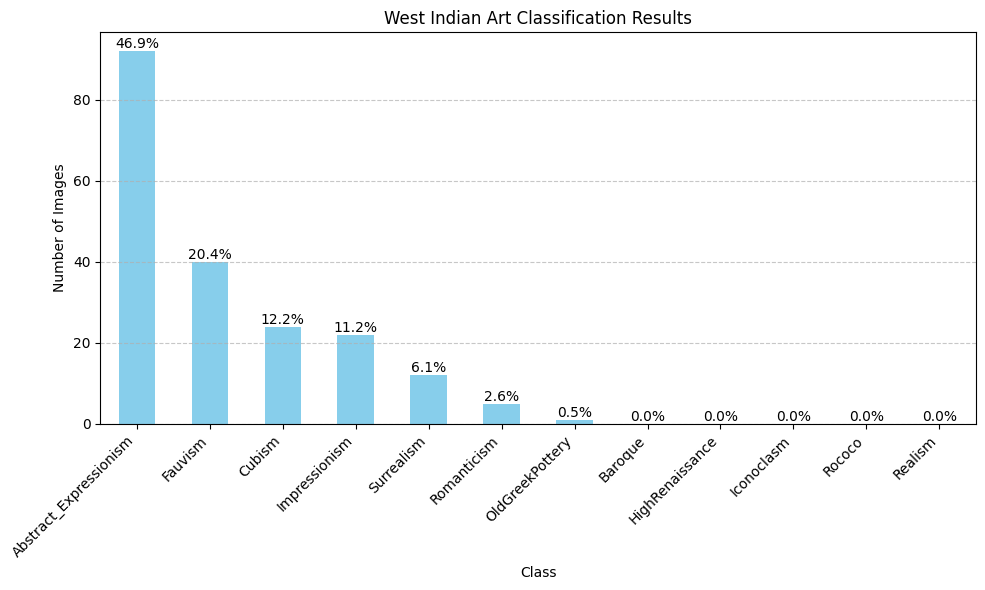

Bar chart saved to d:\git\ECNG3020-ArtGenreClassificationWithWestIndianPaintings\python\similairty\WestIndianArtResults_Dataset1_BaseCase\classification_results_chart_all.png


In [13]:
import os
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import transforms, models, datasets
from PIL import Image
from tqdm import tqdm  # Import tqdm for loading bars

# Paths
model_path=r"D:\git\FYP\ArtGenreClassification\ArtGenreClassification\final\BaseCase_TransferLearning\Experiments\Case_SGD_momentum_gamma\Dataset1\model_Dataset1_SGD_momentum_gamma.pt"
image_folder = r"D:\git\FYP\Python\TwoStage\data\similarity\Dataset1_WI\West_Indian"
class_dir = r"D:\git\FYP\Python\TwoStage\data\Dataset1\Pandora7k_split_70\test"

# Get the current working directory
current_folder = os.getcwd()

# Verify that image and class folders exist
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Image folder not found: {image_folder}")
if not os.path.exists(class_dir):
    raise FileNotFoundError(f"Class directory not found: {class_dir}")

print(f"Processing images from: {image_folder}")
print(f"Using model: {os.path.basename(model_path)}")
print(f"Class directory: {class_dir}")
print(f"Results will be saved to: {current_folder}")

# Create results folder
results_folder = os.path.join(current_folder, "WestIndianArtResults_Dataset1_BaseCase")
os.makedirs(results_folder, exist_ok=True)

# Load model
model = torch.load(model_path, map_location=torch.device('cpu'), weights_only=False)
model.eval()

# Define transformations (same as training)
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load class names correctly from the training dataset
train_dataset = datasets.ImageFolder(class_dir, transform=data_transform)
class_names = train_dataset.classes  # Ensures correct mapping used in training
class_to_idx = train_dataset.class_to_idx  # Mapping of class names to indices

# Create inverse mapping from index to class name
idx_to_class = {v: k for k, v in class_to_idx.items()}

# Create subfolders for each class in results folder
for class_name in class_names:
    class_path = os.path.join(results_folder, class_name)
    os.makedirs(class_path, exist_ok=True)

# Classify images and store results
results = []
image_list = os.listdir(image_folder)

for img_name in tqdm(image_list, desc="Processing Images"):
    img_path = os.path.join(image_folder, img_name)
    
    try:
        image = Image.open(img_path).convert('RGB')
        image = data_transform(image).unsqueeze(0)  # Add batch dimension
        
        with torch.no_grad():
            outputs = model(image)
            probabilities = torch.nn.functional.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)
            predicted_class = idx_to_class[predicted.item()]
            
            # Store top 3 predictions
            top_probs, top_indices = torch.topk(probabilities, 3)
            top_classes = [idx_to_class[idx.item()] for idx in top_indices[0]]
            top_probs = [prob.item() for prob in top_probs[0]]
            
            results.append([img_name, predicted_class, top_classes, top_probs])
            
            # Copy image to corresponding class folder
            class_folder = os.path.join(results_folder, predicted_class)
            dest_path = os.path.join(class_folder, img_name)
            Image.open(img_path).save(dest_path)
    
    except Exception as e:
        print(f"Error processing {img_name}: {e}")

# Save to Excel

# Save results to Excel
df = pd.DataFrame(results, columns=['Image Name', 'Predicted Class', 'Top 3 Classes', 'Top 3 Probabilities'])
df.to_excel(os.path.join(results_folder, 'classification_results.xlsx'), index=False)
print(f"Results saved to {results_folder}")

expected_classes = ['Abstract_Expressionism', 'Baroque', 'Cubism', 'Fauvism', 
                    'HighRenaissance', 'Iconoclasm', 'Impressionism', 'OldGreekPottery', 
                    'Realism', 'Rococo', 'Romanticism', 'Surrealism']

# Ensure the Predicted Class column is a categorical variable with all possible classes
df['Predicted Class'] = pd.Categorical(df['Predicted Class'], categories=expected_classes, ordered=True)

# Recalculate class counts, filling missing categories with 0
class_counts = df['Predicted Class'].value_counts().reindex(expected_classes, fill_value=0)

# Sort from largest to smallest
class_counts = class_counts.sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = class_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("West Indian Art Classification Results")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on top of bars
total = class_counts.sum()
for i, count in enumerate(class_counts):
    percentage = 100 * count / total if total > 0 else 0  # Avoid division by zero
    plt.annotate(f'{percentage:.1f}%', 
                xy=(i, count), 
                ha='center', 
                va='bottom')

plt.tight_layout()

# Save bar chart
chart_path = os.path.join(results_folder, 'classification_results_chart_all.png')
plt.savefig(chart_path)
plt.show()
print(f"Bar chart saved to {chart_path}")




Processing Images: 100%|██████████| 208/208 [02:33<00:00,  1.36it/s]


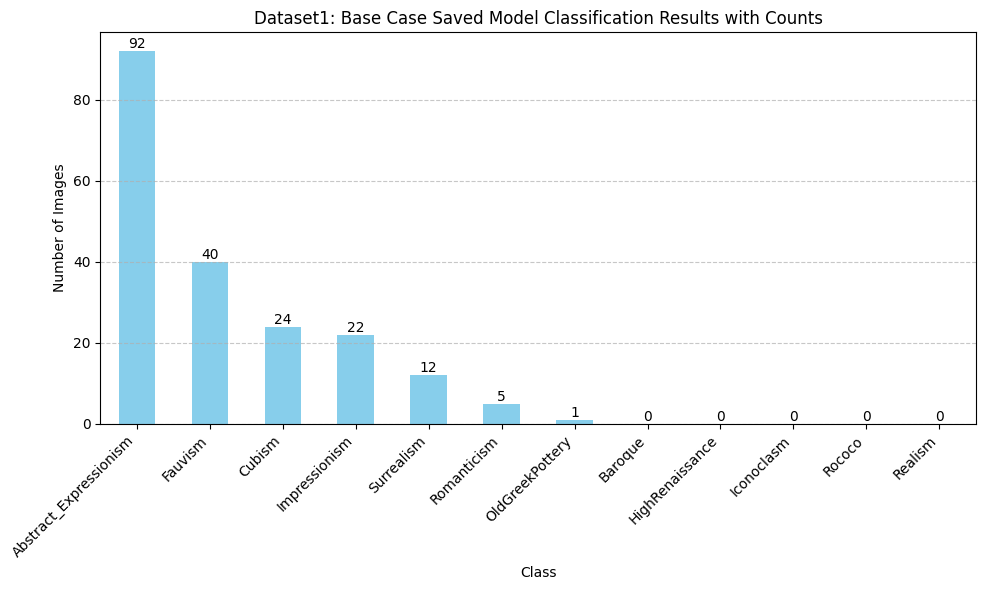

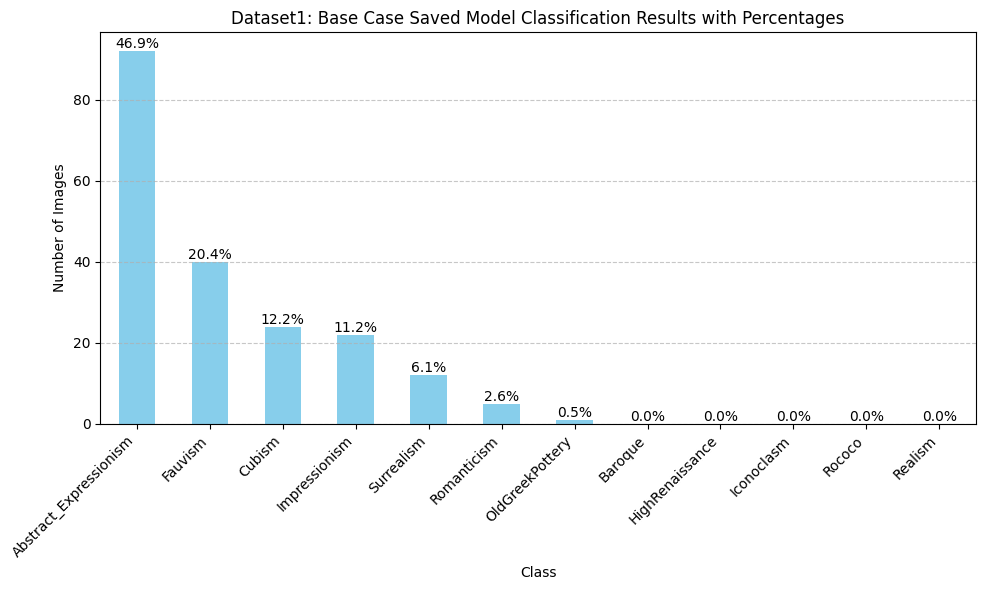

In [16]:
import os
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import transforms, models, datasets
from PIL import Image
from tqdm import tqdm  # Import tqdm for loading bars

# Paths
model_path = r"D:\git\FYP\ArtGenreClassification\ArtGenreClassification\final\BaseCase_TransferLearning\Experiments\Case_SGD_momentum_gamma\Dataset1\model_Dataset1_SGD_momentum_gamma.pt"
image_folder = r"D:\git\FYP\Python\TwoStage\data\similarity\Dataset1_WI\West_Indian"
class_dir = r"D:\git\FYP\Python\TwoStage\data\Dataset1\Pandora7k_split_70\test"

# Get the current working directory
current_folder = os.getcwd()

# Verify that image and class folders exist
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Image folder not found: {image_folder}")
if not os.path.exists(class_dir):
    raise FileNotFoundError(f"Class directory not found: {class_dir}")

# Create results folder
results_folder = os.path.join(current_folder, "WestIndianArtResults_Dataset1_BaseCase")
os.makedirs(results_folder, exist_ok=True)

# Load model
model = torch.load(model_path, map_location=torch.device('cpu'), weights_only=False)
model.eval()

# Define transformations
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load class names
train_dataset = datasets.ImageFolder(class_dir, transform=data_transform)
class_names = train_dataset.classes
class_to_idx = train_dataset.class_to_idx
idx_to_class = {v: k for k, v in class_to_idx.items()}

# Create subfolders for each class
for class_name in class_names:
    os.makedirs(os.path.join(results_folder, class_name), exist_ok=True)

# Classify images and store results
results = []
image_list = os.listdir(image_folder)

for img_name in tqdm(image_list, desc="Processing Images"):
    img_path = os.path.join(image_folder, img_name)
    
    try:
        image = Image.open(img_path).convert('RGB')
        image = data_transform(image).unsqueeze(0)  # Add batch dimension
        
        with torch.no_grad():
            outputs = model(image)
            probabilities = torch.nn.functional.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)
            predicted_class = idx_to_class[predicted.item()]
            
            # Store top 3 predictions
            top_probs, top_indices = torch.topk(probabilities, 3)
            top_classes = [idx_to_class[idx.item()] for idx in top_indices[0]]
            top_probs = [prob.item() for prob in top_probs[0]]
            
            results.append([img_name, predicted_class, top_classes, top_probs])
            
            # Save image to class folder
            Image.open(img_path).save(os.path.join(results_folder, predicted_class, img_name))
    
    except Exception as e:
        print(f"Error processing {img_name}: {e}")

# Save results to Excel
df = pd.DataFrame(results, columns=['Image Name', 'Predicted Class', 'Top 3 Classes', 'Top 3 Probabilities'])
output_excel = os.path.join(results_folder, 'classification_results.xlsx')

# Compute summary
total_images = len(df)
summary_df = df['Predicted Class'].value_counts().reset_index()
summary_df.columns = ['Class Name', 'Number of Images']
summary_df['% Classified'] = (summary_df['Number of Images'] / total_images * 100).round(2)

# Save to Excel with two sheets
with pd.ExcelWriter(output_excel) as writer:
    df.to_excel(writer, sheet_name='Classification Details', index=False)
    summary_df.to_excel(writer, sheet_name='Summary', index=False)

# Plot class distribution
expected_classes = ['Abstract_Expressionism', 'Baroque', 'Cubism', 'Fauvism', 
                    'HighRenaissance', 'Iconoclasm', 'Impressionism', 'OldGreekPottery', 
                    'Realism', 'Rococo', 'Romanticism', 'Surrealism']

df['Predicted Class'] = pd.Categorical(df['Predicted Class'], categories=expected_classes, ordered=True)
class_counts = df['Predicted Class'].value_counts().reindex(expected_classes, fill_value=0)
class_counts = class_counts.sort_values(ascending=False)

def plot_bar_chart(counts, title, filename, show_counts=True, show_percentages=False):
    plt.figure(figsize=(10, 6))
    bars = counts.plot(kind='bar', color='skyblue')
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    if show_counts:
        for i, count in enumerate(counts):
            plt.annotate(f'{count}', xy=(i, count), ha='center', va='bottom')

    if show_percentages:
        total = counts.sum()
        for i, count in enumerate(counts):
            percentage = 100 * count / total if total > 0 else 0
            plt.annotate(f'{percentage:.1f}%', xy=(i, count), ha='center', va='bottom')

    plt.tight_layout()
    plt.savefig(os.path.join(results_folder, filename))
    plt.show()

# Generate plots
plot_bar_chart(class_counts, "Dataset1: Base Case Saved Model Classification Results with Counts", 'classification_results_chart_counts.png', show_counts=True, show_percentages=False)
plot_bar_chart(class_counts, "Dataset1: Base Case Saved Model Classification Results with Percentages", 'classification_results_chart_percentages.png', show_counts=False, show_percentages=True)

